# Autoencoder CNN

> Esse jupyter notebook será usado para apresentação de autoencoders utilizando camadas convolutivas. Ainda estã em desenvolvimento.

# Import dependecies

In [1]:
from keras.datasets import fashion_mnist, mnist, cifar100
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.callbacks import TensorBoard
from keras.optimizers import RMSprop, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


## Import dataset

In [2]:
# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# (X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

(X_train, Y_train), (X_test, Y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 9s 0us/step


## Pre processor

In [0]:
# Normalization

X_train = X_train.astype('float32')/np.max(X_train)
X_test = X_test.astype('float32')/np.max(X_test)

In [4]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Create model

In [5]:
# Input

inChannel = 3
h, w = 32, 32

# Mnist
# inChannel = 1
# h, w = 28, 28


input_img= Input(shape = (h, w, inChannel))

In [6]:
# Encoder 

h = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
h = MaxPooling2D((2, 2), padding='same')(h)

In [7]:
# Decoder 

h = Conv2D(64, (3, 3), activation='relu', padding='same')(h)
h = UpSampling2D((2, 2))(h)
output_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(h)

In [0]:
autoencoder = Model(input_img, output_layer)


In [9]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 3)         1731      
Total params: 40,451
Trainable params: 40,451
Non-trainable params: 0
_______________________________________________________

In [10]:
autoencoder.compile(loss='mse', optimizer = Adam())

## Train model

In [11]:
epochs = 5
batch_size = 256

autoencoder.fit(X_train, X_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])



Train on 50000 samples, validate on 10000 samples


Epoch 1/5
50000/50000 [==============================] - 9s 175us/step - loss: 0.0120 - val_loss: 0.0038
Epoch 2/5
50000/50000 [==============================] - 5s 106us/step - loss: 0.0031 - val_loss: 0.0025
Epoch 3/5
50000/50000 [==============================] - 5s 107us/step - loss: 0.0023 - val_loss: 0.0021
Epoch 4/5
50000/50000 [==============================] - 5s 106us/step - loss: 0.0019 - val_loss: 0.0017
Epoch 5/5
50000/50000 [==============================] - 5s 105us/step - loss: 0.0016 - val_loss: 0.0016


## Prediction

In [0]:
predicted = autoencoder.predict(X_test)

## Plot images

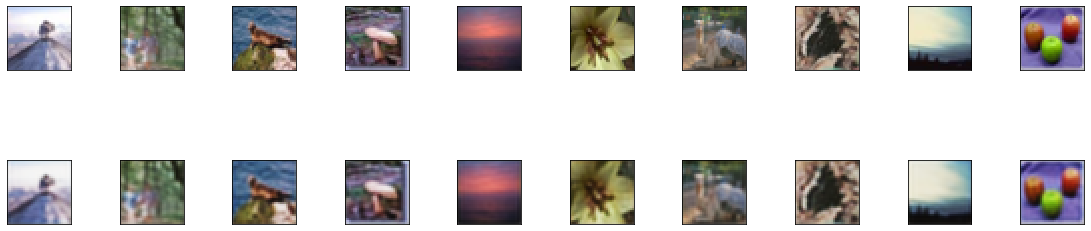

In [13]:
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    

# display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  
    
plt.show()